<a href="https://colab.research.google.com/github/sanathshetty444/cyber-bullying/blob/main/CyberBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
os.chdir('/content/gdrive/MyDrive/CBD_dataset/Non-bullying')

<function posix.fspath>

In [ ]:
if os.path.isdir('train') is False:
  os.makedirs('train')
 
  for c in random.sample(glob.glob('*'),75):
    shutil.move(c,'train')
  

In [ ]:
os.chdir('/content/gdrive/MyDrive/CBD_dataset/Non-bullying')

In [ ]:
if os.path.isdir('valid') is False:
  os.makedirs('valid')
 
  for c in random.sample(glob.glob('*'),15):
    shutil.move(c,'valid')
  

In [ ]:
os.chdir('/content/gdrive/MyDrive/CBD_dataset/Non-bullying')

In [ ]:
if os.path.isdir('test') is False:
  os.makedirs('test')
 
  for c in random.sample(glob.glob('*'),9):
    shutil.move(c,'test')
  

In [ ]:
os.chdir('/content/gdrive/MyDrive/CBD_dataset/')

In [ ]:
if os.path.isdir('valid') is False:
  os.makedirs('valid')
 
  for c in random.sample(glob.glob('*'),12):
    shutil.move(c,'valid')

In [ ]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [ ]:
train_path

'train'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10, shuffle=False)


Found 195 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 195
assert test_batches.n == 15
assert valid_batches.n == 29

In [ ]:
imgs,labels=next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

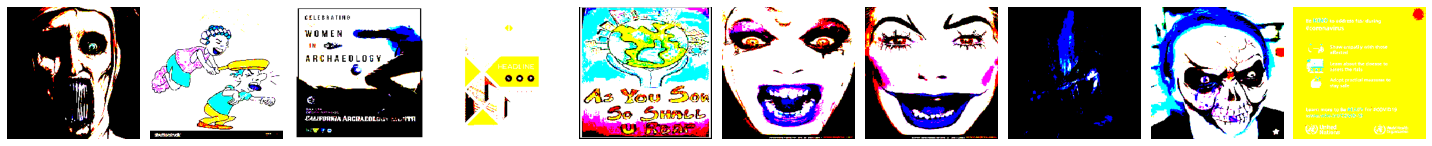

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
20/20 - 58s - loss: 56.7864 - accuracy: 0.5641 - val_loss: 39.9876 - val_accuracy: 0.5517
Epoch 2/10
20/20 - 14s - loss: 17.2455 - accuracy: 0.6769 - val_loss: 16.2259 - val_accuracy: 0.6207
Epoch 3/10
20/20 - 14s - loss: 3.4855 - accuracy: 0.8308 - val_loss: 9.6824 - val_accuracy: 0.6897
Epoch 4/10
20/20 - 14s - loss: 2.8775 - accuracy: 0.8513 - val_loss: 12.1250 - val_accuracy: 0.6207
Epoch 5/10
20/20 - 14s - loss: 0.9729 - accuracy: 0.9436 - val_loss: 4.2706 - val_accuracy: 0.6897
Epoch 6/10
20/20 - 14s - loss: 0.3528 - accuracy: 0.9692 - val_loss: 8.3254 - val_accuracy: 0.7241
Epoch 7/10
20/20 - 14s - loss: 0.0206 - accuracy: 0.9949 - val_loss: 4.3941 - val_accuracy: 0.7586
Epoch 8/10
20/20 - 15s - loss: 5.8024e-04 - accuracy: 1.0000 - val_loss: 4.3560 - val_accuracy: 0.6897
Epoch 9/10
20/20 - 14s - loss: 4.4799e-05 - accuracy: 1.0000 - val_loss: 4.4294 - val_accuracy: 0.7586
Epoch 10/10
20/20 - 14s - loss: 1.9179e-05 - accuracy: 1.0000 - val_loss: 4.4499 - val_accuracy:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

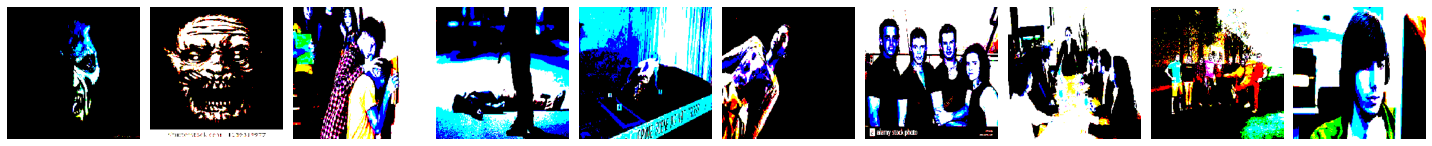

In [ ]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions=model.predict(x=test_batches,verbose=1)

2/2 [==============================] - 0s 96ms/step


In [ ]:
predictions

array([[1.00000000e+00, 2.54998578e-13],
       [1.00000000e+00, 1.28615261e-12],
       [1.73633829e-12, 1.00000000e+00],
       [1.00000000e+00, 7.77178837e-20],
       [8.33045397e-06, 9.99991655e-01],
       [1.00000000e+00, 2.96254347e-15],
       [1.00000000e+00, 6.33723429e-09],
       [1.48446807e-05, 9.99985099e-01],
       [8.05731497e-26, 1.00000000e+00],
       [1.06341091e-07, 9.99999881e-01],
       [1.09107781e-07, 9.99999881e-01],
       [1.60317869e-31, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.46985640e-09, 1.00000000e+00],
       [1.04424806e-22, 1.00000000e+00]], dtype=float32)

In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [ ]:
cm

array([[4, 2],
       [1, 8]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4 2]
 [1 8]]


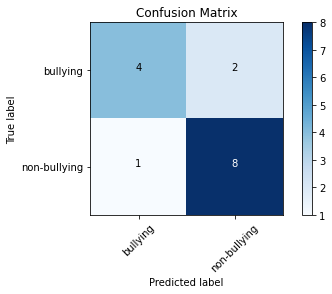

In [ ]:
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
cm = classification_report(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [ ]:
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.80      0.89      0.84         9

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



In [ ]:
ac = accuracy_score(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [ ]:
ac

0.8